In [ ]:
import pandas as pd
import numpy as np
ga_data_list=[
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Gamma_combined_filted_1e11_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Gamma_combined_filted_1e11_V03_15_16_params.csv",
                ]
R_thresholds = -2.36
for data_file in ga_data_list:
    df = pd.read_csv(data_file)
    num = len(df[df['R_ue'] < R_thresholds])
    print(num/len(df))
    
print()
pr_data_list=[
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Proton_combined_filted_1e11_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Proton_combined_filted_1e11_V03_15_16_params.csv",
                '/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Monopole_combined_filted_1e11_V03_params.csv'
                ]

for data_file in pr_data_list:
    df = pd.read_csv(data_file)
    num = len(df[df['R_ue'] < R_thresholds])
    print(num/len(df))

0.9449857592564833
0.9358183703541997

0.0
0.00019013816706806946
0.9616724738675958


when GNN output>0.0, bkg num=1100.00, sig num=730.87
significance=2.2037e+01
when GNN output>0.2, bkg num=310.00, sig num=579.66
significance=3.2922e+01
when GNN output>0.4, bkg num=105.00, sig num=466.25
significance=4.5501e+01
when GNN output>0.6, bkg num=30.00, sig num=252.02
significance=4.6013e+01
when GNN output>0.78, bkg num=0.00, sig num=100.81
使用Feldman-Cousin方法计算上限: 2.420e-17


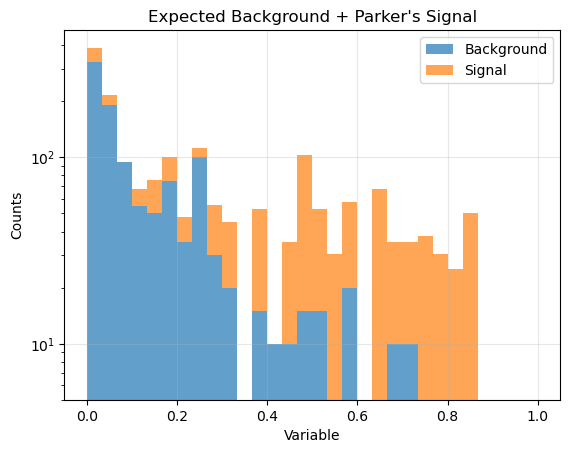

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
seconds= 365*24*3600 # 1年 的秒数
eff_areas = 600*600*np.pi*1e4 #  ~单位cm^2
eff_sr=2.243 # 河外立体角, km2a视场

data=np.load('/home/zhonghua/Filt_Event/figures/GNN_Val_hist_1e11_V03_csv.npz')
# data=np.load('/home/zhonghua/Filt_Event/figures/GNN_Val_hist_1e10_V03_csv-proton.npz')
bkg=data['bkg_hist']
sig=data['sig_hist']
R_thresholds=[0.0,0.2,0.4,0.6,0.78,]

sig_num=800*0.95*0.9616724  # 800*0.95*0.91461
bkg_num=164+46+248+642 
for i in R_thresholds:
    bkg_ratio=len(bkg[bkg>i])/len(bkg)
    sig_ratio=len(sig[sig>i])/len(sig)
    print(f'when GNN output>{i}, bkg num={bkg_ratio*bkg_num:.2f}, sig num={sig_ratio*sig_num:.2f}')
    if bkg_ratio*bkg_num==0 and sig_ratio*sig_num!=0:
        print(f'使用Feldman-Cousin方法计算上限: {2.44/(seconds*eff_areas*eff_sr*0.95*0.9616724*sig_ratio):.3e}')
    else:
        print(f'significance={sig_ratio*sig_num/np.sqrt(bkg_ratio*bkg_num):.4e}')


bins=30
bkg_pdf,bins_edge=np.histogram(bkg, bins=bins, density=True, range=(0,1))
sig_pdf,_=np.histogram(sig, bins=bins, density=True, range=(0,1))
bkg_counts=bkg_pdf*bkg_num*np.diff(bins_edge)
sig_counts=sig_pdf*sig_num*np.diff(bins_edge)


plt.bar(bins_edge[:-1], bkg_counts, width=np.diff(bins_edge), 
        align='edge', alpha=0.7, label='Background',)

# 再绘制信号（堆叠在背景上面）
plt.bar(bins_edge[:-1], sig_counts, width=np.diff(bins_edge), 
        align='edge', alpha=0.7, label='Signal',  
        bottom=bkg_counts)  # 关键：使用bottom参数堆叠
plt.yscale('log')
plt.xlabel('Variable')
plt.ylabel('Counts')
plt.title("Expected Background + Parker's Signal")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

mu=0.015, CLs=0.222, q_obs=2.79
mu=0.016, CLs=0.204, q_obs=2.97
mu=0.017, CLs=0.190, q_obs=3.14
mu=0.017, CLs=0.171, q_obs=3.32
mu=0.018, CLs=0.154, q_obs=3.50
mu=0.019, CLs=0.158, q_obs=3.69
mu=0.020, CLs=0.112, q_obs=3.88
mu=0.021, CLs=0.082, q_obs=4.06
mu=0.021, CLs=0.109, q_obs=4.26
mu=0.022, CLs=0.073, q_obs=4.45
mu=0.023, CLs=0.084, q_obs=4.65
mu=0.024, CLs=0.076, q_obs=4.84
mu=0.024, CLs=0.073, q_obs=5.05
mu=0.025, CLs=0.063, q_obs=5.25
mu=0.026, CLs=0.045, q_obs=5.45
mu=0.027, CLs=0.027, q_obs=5.66
mu=0.028, CLs=0.037, q_obs=5.87
mu=0.028, CLs=0.028, q_obs=6.08
mu=0.029, CLs=0.037, q_obs=6.30
mu=0.030, CLs=0.019, q_obs=6.52
90% CL upper limit on mu = 0.020526315789473684


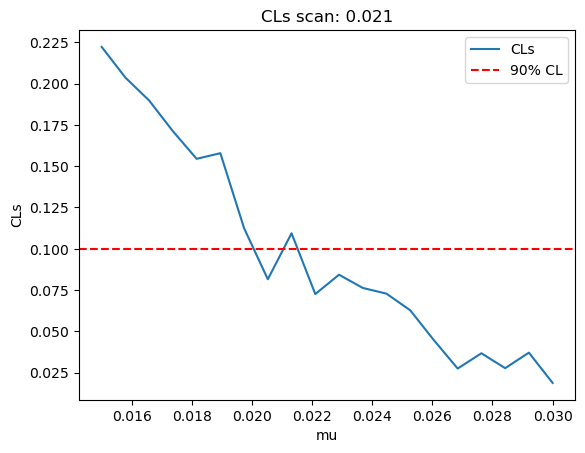

In [ ]:
import numpy as np
from scipy.special import gammaln

# 泊松似然
def poisson_likelihood(mu, n_obs, s_counts, b_counts):
    lam = mu * s_counts + b_counts
    lam = np.clip(lam, 1e-12, None)
    logL = np.sum(n_obs * np.log(lam) - lam - gammaln(n_obs + 1))
    return logL

# test statistic: q_mu
def q_mu(mu, n_obs, s_counts, b_counts):
    logL_mu = poisson_likelihood(mu, n_obs, s_counts, b_counts)
    # 找到 best fit (mu_hat>=0)
    mu_hat_grid = np.linspace(0, 0.2, 50)
    logL_vals = [poisson_likelihood(muh, n_obs, s_counts, b_counts) for muh in mu_hat_grid]
    mu_hat = mu_hat_grid[np.argmax(logL_vals)]
    logL_max = np.max(logL_vals)
    return -2 * (logL_mu - logL_max), mu_hat

# 生成 toy 数据
def generate_toys(mu, s_counts, b_counts, n_toys=1000):
    lam = mu * s_counts + b_counts
    return np.random.poisson(lam, size=(n_toys, len(lam)))

# CLs 计算
def compute_CLs(mu, n_obs, s_counts, b_counts, n_toys=2000):
    q_obs, _ = q_mu(mu, n_obs, s_counts, b_counts)

    # toys under signal+background
    toys_sb = generate_toys(mu, s_counts, b_counts, n_toys)
    q_sb = [q_mu(mu, toy, s_counts, b_counts)[0] for toy in toys_sb]
    p_mu = np.mean(np.array(q_sb) >= q_obs)

    # toys under background only
    toys_b = generate_toys(0, s_counts, b_counts, n_toys)
    q_b = [q_mu(mu, toy, s_counts, b_counts)[0] for toy in toys_b]
    p_b = np.mean(np.array(q_b) >= q_obs)

    CLs = p_mu / (1 - p_b + 1e-12)
    return CLs, q_obs

sig_hist=data['sig_hist']
bkg_hist=data['bkg_hist']
sig_num=800*0.95*0.9616724  # 800*0.95*0.91461
bkg_num=164+46+248+642 
# sig_num*=5
# bkg_num*=5
R_threshold=0.
bins=20

s_pdf,bin_edges=np.histogram(sig_hist, bins=bins, density=True, range=(0,1))
b_pdf,_=np.histogram(bkg_hist, bins=bins, density=True, range=(0,1))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
mask = bin_centers > R_threshold
bin_widths = np.diff(bin_edges)[mask]
s_pdf_cut=s_pdf[mask]
b_pdf_cut=b_pdf[mask]
s_counts = s_pdf_cut*sig_num*bin_widths
b_counts = b_pdf_cut*bkg_num*bin_widths

counts,_ = np.histogram(data['bkg_hist'], bins=bins, density=True, range=(0,1))
n_obs_pdf_cut = counts[mask]
n_obs = n_obs_pdf_cut * bkg_num * bin_widths

mu_scan = np.linspace(0.015, 0.03, 20)
CLs_list = []
for mu in mu_scan:
    CLs_val, q_obs = compute_CLs(mu, n_obs, s_counts, b_counts, n_toys=1000)
    print(f"mu={mu:.3f}, CLs={CLs_val:.3f}, q_obs={q_obs:.2f}")
    CLs_list.append(CLs_val)

# 找到90% CL 上限
mask = np.array(CLs_list) < 0.1
if np.any(mask):
    mu_upper = mu_scan[np.where(mask)[0][0]]
    print("90% CL upper limit on mu =", mu_upper)
else:
    print("没有找到小于0.1的 CLs，请扩大 mu 范围")

plt.plot(mu_scan, CLs_list, label="CLs")
plt.axhline(0.1, color='r', linestyle='--', label="90% CL")
plt.xlabel("mu")
plt.ylabel("CLs")
plt.title(f"CLs scan: {mu_upper:.3f}")
plt.legend()
plt.show()

Total bkg nums: 4.63e+06
mn left: 6.83e+02, ga left: 1.97e+02, pr left: 0.00e+00, bkg left: 1.97e+02
Thresholds: -2.5: 
 mn=8.98e-01
 pr=[0.0, 0.0]
 ga=[0.887722980062959, 0.8858265567865524]
 Significance: 4.86e+01



    mu=0.015, CLs=0.427, q_obs=1.55
    mu=0.016, CLs=0.379, q_obs=1.76
    mu=0.017, CLs=0.323, q_obs=1.98
    mu=0.018, CLs=0.274, q_obs=2.21
    mu=0.019, CLs=0.260, q_obs=2.45
    mu=0.020, CLs=0.205, q_obs=2.69
    mu=0.021, CLs=0.175, q_obs=2.95
    mu=0.022, CLs=0.139, q_obs=3.22
    mu=0.023, CLs=0.141, q_obs=3.50
    mu=0.024, CLs=0.110, q_obs=3.78
    mu=0.026, CLs=0.088, q_obs=4.08
    mu=0.027, CLs=0.082, q_obs=4.38
    mu=0.028, CLs=0.070, q_obs=4.69
    mu=0.029, CLs=0.050, q_obs=5.01
    mu=0.030, CLs=0.040, q_obs=5.34
    mu=0.031, CLs=0.045, q_obs=5.67
    mu=0.032, CLs=0.035, q_obs=6.01
    mu=0.033, CLs=0.017, q_obs=6.36
    mu=0.034, CLs=0.024, q_obs=6.72
    mu=0.035, CLs=0.022, q_obs=7.08
     90% CL upper limit on mu = 0.025526315789473685


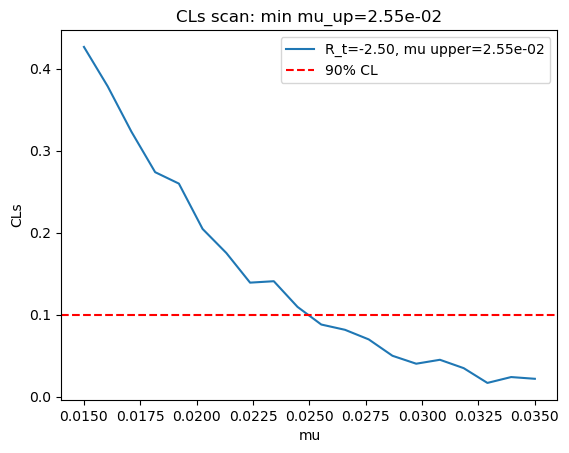

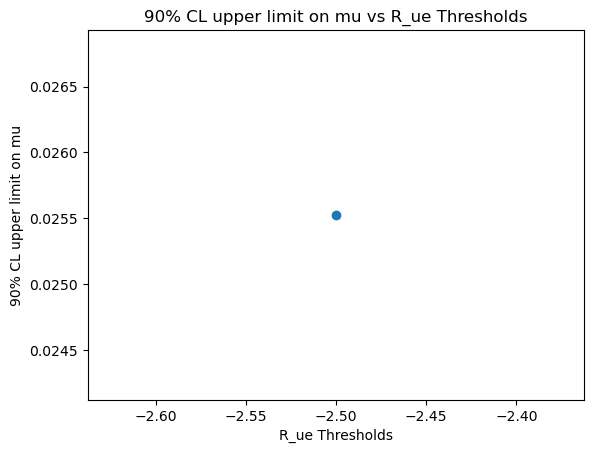

Optimal R_ue Thresholds: -2.5000, with Significance: 48.5843, at mn_ratio=8.98e-01, pr_ratios=['0.00e+00', '0.00e+00'], ga_ratios=['8.88e-01', '8.86e-01']
Left: mn_num=6.83e+02, pr_num=0.00e+00, ga_num=1.97e+02


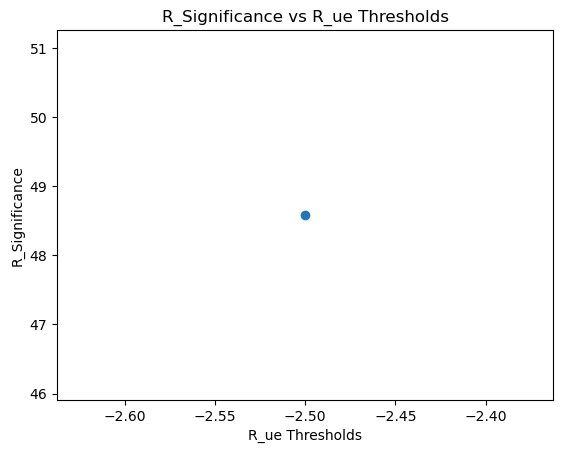

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import gammaln
def CLs(data, sig_num, bkg_num, mu_scan=np.linspace(0.001, 0.008, 10), R_t=-2.36, ranges=(0,1)):
    def poisson_likelihood(mu, n_obs, s_counts, b_counts):
        lam = mu * s_counts + b_counts
        lam = np.clip(lam, 1e-12, None)
        logL = np.sum(n_obs * np.log(lam) - lam - gammaln(n_obs + 1))
        return logL

    # test statistic: q_mu
    def q_mu(mu, n_obs, s_counts, b_counts):
        logL_mu = poisson_likelihood(mu, n_obs, s_counts, b_counts)
        # 找到 best fit (mu_hat>=0)
        mu_hat_grid = np.linspace(0, 0.2, 50)
        logL_vals = [poisson_likelihood(muh, n_obs, s_counts, b_counts) for muh in mu_hat_grid]
        mu_hat = mu_hat_grid[np.argmax(logL_vals)]
        logL_max = np.max(logL_vals)
        return -2 * (logL_mu - logL_max), mu_hat

    # 生成 toy 数据
    def generate_toys(mu, s_counts, b_counts, n_toys=1000):
        lam = mu * s_counts + b_counts
        return np.random.poisson(lam, size=(n_toys, len(lam)))

    # CLs 计算
    def compute_CLs(mu, n_obs, s_counts, b_counts, n_toys=2000):
        q_obs, _ = q_mu(mu, n_obs, s_counts, b_counts)

        # toys under signal+background
        toys_sb = generate_toys(mu, s_counts, b_counts, n_toys)
        q_sb = [q_mu(mu, toy, s_counts, b_counts)[0] for toy in toys_sb]
        p_mu = np.mean(np.array(q_sb) >= q_obs)

        # toys under background only
        toys_b = generate_toys(0, s_counts, b_counts, n_toys)
        q_b = [q_mu(mu, toy, s_counts, b_counts)[0] for toy in toys_b]
        p_b = np.mean(np.array(q_b) >= q_obs)

        CLs = p_mu / (1 - p_b + 1e-12)
        return CLs, q_obs

    sig_hist=data['sig_hist']
    bkg_hist=data['bkg_hist']
    # sig_num*=5
    # bkg_num*=5
    threshold=0.4
    bins=50

    s_pdf,bin_edges=np.histogram(sig_hist, bins=bins, density=True, range=ranges)
    b_pdf,_=np.histogram(bkg_hist, bins=bins, density=True, range=ranges)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    mask = bin_centers > threshold
    bin_widths = np.diff(bin_edges)[mask]
    s_pdf_cut=s_pdf[mask]
    b_pdf_cut=b_pdf[mask]
    s_counts = s_pdf_cut*sig_num*bin_widths
    b_counts = b_pdf_cut*bkg_num*bin_widths

    counts,_ = np.histogram(data['bkg_hist'], bins=bins, density=True, range=ranges)
    n_obs_pdf_cut = counts[mask]
    n_obs = n_obs_pdf_cut * bkg_num * bin_widths

    # mu_scan = np.linspace(0.15, 0.4, 10)
    CLs_list = []
    for mu in mu_scan:
        CLs_val, q_obs = compute_CLs(mu, n_obs, s_counts, b_counts, n_toys=3000)
        print(f"    mu={mu:.3f}, CLs={CLs_val:.3f}, q_obs={q_obs:.2f}")
        CLs_list.append(CLs_val)

    # 找到90% CL 上限
    mask = np.array(CLs_list) < 0.1
    if np.any(mask):
        mu_upper = mu_scan[np.where(mask)[0][0]]
        print("     90% CL upper limit on mu =", mu_upper)
    else:
        mu_upper = np.nan
        print("     没有找到小于0.1的 CLs, 请扩大 mu 范围")

    plt.plot(mu_scan, CLs_list, label=f"R_t={R_t:.2f}, mu upper={mu_upper:.2e}")
    return mu_upper

ga_data_list=[
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Gamma_combined_filted_1e11_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Gamma_combined_filted_1e11_V03_15_16_params.csv",
                ]
pr_data_list=[
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Proton_combined_filted_1e11_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Proton_combined_filted_1e11_V03_15_16_params.csv",
                
                ]
mn_data_list=['/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Monopole_combined_filted_1e11_V03_params.csv']


seconds= 365*24*3600 # 1年 的秒数
eff_areas = 600*600*np.pi*1e4 #  ~单位cm^2
eff_sr=2.243 # 河外立体角, km2a视场

data=np.load('/home/zhonghua/Filt_Event/figures/GNN_Test_hist_1e11_V03.npz')
bkg=data['bkg_hist']
sig=data['sig_hist']

ga_nums=[2.20E+04*0.00789, 2.25E+02*0.217]
pr_nums=[1.23E+09*0.00106, 1.78E+07*0.187]
bkg_nums=np.sum(pr_nums)+np.sum(ga_nums)
print(f"Total bkg nums: {bkg_nums:.2e}")
mn_nums=800*0.95

R_significancs=[]
GNN_significs=[]
mu_up_list=[]
# R_thresholds=np.arange(-2.55,-2.45, 0.02)
R_thresholds=[-2.50]
mu_scan = np.linspace(0.015, 0.035, 20)

for R_threshold in R_thresholds:
    ga_ratios=[]
    pr_ratios=[]
    mn_ratio=1
    for data_file in ga_data_list:
        df = pd.read_csv(data_file)
        num = len(df[df['R_ue'] < R_threshold])
        ga_ratios.append(num/len(df))
    for data_file in pr_data_list:
        df = pd.read_csv(data_file)
        num = len(df[df['R_ue'] < R_threshold])
        pr_ratios.append(num/len(df))
    for data_file in mn_data_list:
        df = pd.read_csv(data_file)
        num = len(df[df['R_ue'] < R_threshold])
        mn_ratio=num/len(df)
    ga_lefts=np.sum(np.array(ga_nums)*np.array(ga_ratios))
    pr_lefts=np.sum(np.array(pr_nums)*np.array(pr_ratios))
    bkg_left=np.sum(np.array(pr_nums)*np.array(pr_ratios))+np.sum(np.array(ga_nums)*np.array(ga_ratios))
    print(f"mn left: {mn_ratio*mn_nums:.2e}, ga left: {ga_lefts:.2e}, pr left: {pr_lefts:.2e}, bkg left: {bkg_left:.2e}")
    significance=(mn_nums*mn_ratio)/np.sqrt(bkg_left)
    print(f"Thresholds: {R_threshold}: \n mn={mn_ratio:.2e}\n pr={pr_ratios}\n ga={ga_ratios}\n Significance: {significance:.2e}\n")
    R_significancs.append(significance)

    
    bkg_lefts=np.sum(np.array(pr_nums)*np.array(pr_ratios))+np.sum(np.array(ga_nums)*np.array(ga_ratios))
    mu_up=CLs(data, mn_nums*mn_ratio, bkg_lefts, mu_scan=mu_scan, R_t=R_threshold)
    mu_up_list.append(mu_up)

plt.axhline(0.1, color='r', linestyle='--', label="90% CL")
plt.xlabel("mu")
plt.ylabel("CLs")
plt.title(f"CLs scan: min mu_up={np.nanmin(mu_up_list):.2e}")
plt.legend()
plt.savefig(f'./PPT_figs/CLs_scan_1e11_V03_Rt.png')
plt.show()
plt.close()

plt.plot(R_thresholds,mu_up_list,marker='o')
plt.xlabel('R_ue Thresholds')
plt.ylabel('90% CL upper limit on mu')
plt.title('90% CL upper limit on mu vs R_ue Thresholds')
plt.savefig(f'./PPT_figs/mu_up_1e11_V03_Rt.png')
plt.show()
plt.close()
print(f"Optimal R_ue Thresholds: {R_thresholds[np.argmax(R_significancs)]:.4f}, with Significance: {max(R_significancs):.4f}, at mn_ratio={mn_ratio:.2e}, pr_ratios={[f'{r:.2e}' for r in pr_ratios]}, ga_ratios={[f'{r:.2e}' for r in ga_ratios]}")
print(f"Left: mn_num={mn_nums*mn_ratio:.2e}, pr_num={np.sum(np.array(pr_nums)*np.array(pr_ratios)):.2e}, ga_num={np.sum(np.array(ga_nums)*np.array(ga_ratios)):.2e}")
plt.plot(R_thresholds,R_significancs,marker='o')
plt.xlabel('R_ue Thresholds')
plt.ylabel('R_Significance')
plt.title('R_Significance vs R_ue Thresholds')
plt.savefig(f'./PPT_figs/R_Significance_1e11_V03_Rt.png')
plt.show()



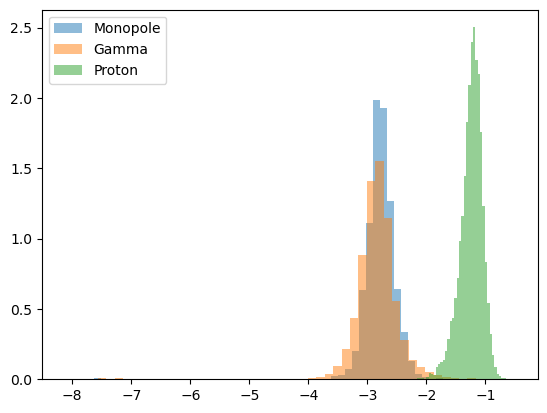

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ga_data_list=[
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Gamma_combined_filted_1e11_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Gamma_combined_filted_1e11_V03_15_16_params.csv",
                ]
pr_data_list=[
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Proton_combined_filted_1e11_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Proton_combined_filted_1e11_V03_15_16_params.csv",
                
                ]
mn_data_list=['/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Monopole_combined_filted_1e11_V03_params.csv']

ga_data_all=pd.concat([pd.read_csv(f) for f in ga_data_list])
pr_data_all=pd.concat([pd.read_csv(f) for f in pr_data_list])
mn_data_all=pd.read_csv(mn_data_list[0])
plt.hist(mn_data_all['R_ue'], bins=50, alpha=0.5, label='Monopole', density=True)
plt.hist(ga_data_all['R_ue'], bins=50, alpha=0.5, label='Gamma', density=True)
plt.hist(pr_data_all['R_ue'], bins=50, alpha=0.5, label='Proton', density=True)

plt.legend()
plt.show()

In [ ]:
# use only Eage

ga_data_list=[
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Gamma_combined_filted_1e11_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Gamma_combined_filted_1e11_V03_15_16_params.csv",
                ]
pr_data_list=[
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Proton_combined_filted_1e11_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Proton_combined_filted_1e11_V03_15_16_params.csv",
                
                ]
mn_data_list=['/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Monopole_combined_filted_1e11_V03_params.csv']


seconds= 365*24*3600 # 1年 的秒数
eff_areas = 600*600*np.pi*1e4 #  ~单位cm^2
eff_sr=2.243 # 河外立体角, km2a视场

data=np.load('/home/zhonghua/Filt_Event/figures/GNN_test_hist_1e11_V03_csv.npz')
bkg=data['bkg_hist']
sig=data['sig_hist']

ga_nums=[2.20E+04*0.00789, 2.25E+02*0.217]
pr_nums=[1.23E+09*0.00106, 1.78E+07*0.187]
bkg_nums=np.sum(pr_nums)+np.sum(ga_nums)
print(f"Total bkg nums: {bkg_nums:.2e}")
mn_nums=800*0.95

R_significancs=[]
GNN_significs=[]
mu_up_list=[]
R_thresholds=np.arange(-2.55,-2.45, 0.02)
mu_scan = np.linspace(0.005, 0.05, 10)

for R_threshold in R_thresholds:
    ga_ratios=[]
    pr_ratios=[]
    mn_ratio=1
    for data_file in ga_data_list:
        df = pd.read_csv(data_file)
        num = len(df[df['R_ue'] < R_threshold])
        ga_ratios.append(num/len(df))
    for data_file in pr_data_list:
        df = pd.read_csv(data_file)
        num = len(df[df['R_ue'] < R_threshold])
        pr_ratios.append(num/len(df))
    for data_file in mn_data_list:
        df = pd.read_csv(data_file)
        num = len(df[df['R_ue'] < R_threshold])
        mn_ratio=num/len(df)
    ga_lefts=np.sum(np.array(ga_nums)*np.array(ga_ratios))
    pr_lefts=np.sum(np.array(pr_nums)*np.array(pr_ratios))
    bkg_left=np.sum(np.array(pr_nums)*np.array(pr_ratios))+np.sum(np.array(ga_nums)*np.array(ga_ratios))
    print(f"mn left: {mn_ratio*mn_nums:.2e}, ga left: {ga_lefts:.2e}, pr left: {pr_lefts:.2e}, bkg left: {bkg_left:.2e}")
    significance=(mn_nums*mn_ratio)/np.sqrt(bkg_left)
    print(f"Thresholds: {R_threshold}: \n mn={mn_ratio:.2e}\n pr={pr_ratios}\n ga={ga_ratios}\n Significance: {significance:.2e}\n")
    R_significancs.append(significance)

    
    bkg_lefts=np.sum(np.array(pr_nums)*np.array(pr_ratios))+np.sum(np.array(ga_nums)*np.array(ga_ratios))
    mu_up=CLs(data, mn_nums*mn_ratio, bkg_lefts, mu_scan=mu_scan, R_t=R_threshold)
    mu_up_list.append(mu_up)

plt.axhline(0.1, color='r', linestyle='--', label="90% CL")
plt.xlabel("mu")
plt.ylabel("CLs")
plt.title(f"CLs scan: min mu_up={np.nanmin(mu_up_list):.2e}")
plt.legend()
plt.savefig(f'./PPT_figs/CLs_scan_1e11_V03_Rt.png')
plt.show()
plt.close()

plt.plot(R_thresholds,mu_up_list,marker='o')
plt.xlabel('R_ue Thresholds')
plt.ylabel('90% CL upper limit on mu')
plt.title('90% CL upper limit on mu vs R_ue Thresholds')
plt.savefig(f'./PPT_figs/mu_up_1e11_V03_Rt.png')
plt.show()
plt.close()
print(f"Optimal R_ue Thresholds: {R_thresholds[np.argmax(R_significancs)]:.4f}, with Significance: {max(R_significancs):.4f}, at mn_ratio={mn_ratio:.2e}, pr_ratios={[f'{r:.2e}' for r in pr_ratios]}, ga_ratios={[f'{r:.2e}' for r in ga_ratios]}")
print(f"Left: mn_num={mn_nums*mn_ratio:.2e}, pr_num={np.sum(np.array(pr_nums)*np.array(pr_ratios)):.2e}, ga_num={np.sum(np.array(ga_nums)*np.array(ga_ratios)):.2e}")
plt.plot(R_thresholds,R_significancs,marker='o')
plt.xlabel('R_ue Thresholds')
plt.ylabel('R_Significance')
plt.title('R_Significance vs R_ue Thresholds')
plt.savefig(f'./PPT_figs/R_Significance_1e11_V03_Rt.png')
plt.show()
